<a href="https://colab.research.google.com/github/tawfiqam/bertLDA/blob/main/Topic2Vec.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!pip install top2vec

     |████████████████████████████████| 2.6MB 4.7MB/s 
     |████████████████████████████████| 61kB 6.0MB/s 
     |████████████████████████████████| 4.7MB 31.8MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 1.1MB 32.9MB/s 
     |████████████████████████████████| 1.1MB 36.4MB/s 
     |████████████████████████████████| 890kB 36.8MB/s 
     |████████████████████████████████| 3.0MB 40.0MB/s 
     |████████████████████████████████| 1.1MB 41.0MB/s 
  Created wheel for hdbscan: filename=hdbscan-0.8.26-cp36-cp36m-linux_x86_64.whl size=2301757 sha256=7a5fecc62fef0284c084b3af7929af44784dde41aacba6c008507fbab83cc1e0
  Stored in directory: /root/.cache/pip/wheels/82/38/41/372f034d8abd271ef7787a681e0a47fc05d472683a7eb088ed
Successfully built hdbscan
  Created wheel for sentence-transformers: filename=sentence_transformers-0.3.7.2-cp36-none-any.whl size=91190 sha256=d9c0f862367

In [4]:
! pip install numba conda update numba

     |████████████████████████████████| 307kB 3.3MB/s 
     |████████████████████████████████| 71kB 4.7MB/s 
     |████████████████████████████████| 112kB 4.6MB/s 
     |████████████████████████████████| 552kB 8.1MB/s 
  Created wheel for conda: filename=conda-4.3.16-cp36-none-any.whl size=336938 sha256=29f7ccbd20ef23a94634efabcd463a7cb19a46ec26f28828d79ed388e3b533c1
  Stored in directory: /root/.cache/pip/wheels/a3/50/79/302742d53e2231ec545cb3791abfdd24de234021ed8e0588a0
  Created wheel for pycosat: filename=pycosat-0.6.3-cp36-cp36m-linux_x86_64.whl size=142848 sha256=0d91a80dd8d4af8830592ffc700d5eb78a40e6476258b6f611ba81d4b0f85d98
  Stored in directory: /root/.cache/pip/wheels/c4/67/ff/5570304e45814eccef48a3c69c3af25d0456ed3a34eddbbe38
Successfully built conda pycosat


In [5]:
from top2vec import Top2Vec
import pandas as pd
pd.options.display.max_columns = None
pd.options.display.max_rows = 1000
pd.set_option('display.max_colwidth', -1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  after removing the cwd from sys.path.


In [43]:
df = pd.read_pickle('Foster_LDA.pkl')
docs = df.body.values

In [8]:
model = Top2Vec(documents=docs, speed="learn", workers=20, verbose=True, min_count=10, keep_documents=True, document_ids=df.id)

2020-10-16 01:27:34,366 - top2vec - INFO - Pre-processing documents for training
2020-10-16 01:27:36,515 - top2vec - INFO - Creating joint document/word embedding
2020-10-16 01:30:41,538 - top2vec - INFO - Creating lower dimension embedding of documents
2020-10-16 01:31:11,110 - top2vec - INFO - Finding dense areas of documents
2020-10-16 01:31:11,975 - top2vec - INFO - Finding topics
/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


In [9]:
model.get_num_topics()

130

In [10]:
len(docs)

11830

In [13]:
topic_sizes, topic_nums = model.get_topic_sizes()

In [14]:
topic_nums

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129])

In [15]:
topic_sizes

array([337, 320, 286, 271, 269, 267, 266, 244, 236, 199, 191, 181, 177,
       170, 170, 160, 147, 144, 139, 135, 134, 131, 121, 120, 117, 114,
       113, 111, 108, 105, 104, 103, 101, 101,  97,  97,  97,  96,  95,
        95,  94,  93,  93,  91,  91,  88,  88,  84,  84,  83,  82,  82,
        82,  80,  79,  77,  77,  76,  76,  75,  73,  73,  72,  71,  71,
        69,  68,  68,  68,  68,  67,  66,  65,  64,  63,  62,  61,  61,
        60,  60,  59,  59,  59,  58,  57,  57,  57,  56,  56,  55,  55,
        55,  55,  54,  54,  54,  53,  52,  51,  50,  49,  49,  49,  49,
        48,  48,  48,  48,  47,  47,  45,  44,  44,  42,  41,  41,  40,
        40,  39,  39,  39,  39,  38,  37,  36,  35,  34,  33,  31,  31])

In [16]:
sum(topic_sizes)

11830

In [18]:
documents, doc_scores, doc_id = model.search_documents_by_topic(0,337,return_documents=True,reduced=False)

In [23]:
topic_dataframe = pd.DataFrame(
    {'id': doc_id,
     'topic': doc_scores,
    })

In [163]:
list_of_topic_df = []
i = 0
for topic in topic_nums:
  documents, doc_scores, doc_id = model.search_documents_by_topic(topic,topic_sizes[i],return_documents=True,reduced=False)
  topic_dataframe = pd.DataFrame({'id':doc_id,'score'+str(topic):doc_scores})
  list_of_topic_df.append(topic_dataframe)
  i+=1

In [170]:
df_copy = df.copy()

In [171]:
for df_ in list_of_topic_df:
    df_copy = pd.merge(df_copy,df_, on='id',how='outer')

In [176]:
pd.options.display.max_columns = None

In [178]:
df_copy = df_copy.fillna(0)

In [182]:
df_copy[df_copy['score0']>0.6].head(4)

index all_awardings  associated_award                author  \
1459  1476   []            0.0               MoeStan                
1561  1580   []            0.0               RustyShackleford1079   
2829  2860   []            0.0               gvike2011              
4931  5010   []            0.0               importedpublic         

     author_flair_background_color  author_flair_css_class  \
1459  0                             0.0                      
1561  0                             0.0                      
2829  0                             0.0                      
4931  0                             0.0                      

     author_flair_richtext author_flair_template_id author_flair_text  \
1459  []                    0                        0                  
1561  []                    0                        0                  
2829  []                    0                        0                  
4931  []                    0                        0                  

     author_flair_text_color author_flair_type author_fullname  \
1459  0                       text              t2_4wad1w2d      
1561  0                       text              t2_1e2fhp15      
2829  0                       text              t2_13881z4l      
4931  0                       text              t2_1a1e1lna      

      author_patreon_flair  author_premium awarders  \
1459  0.0                   0.0             []        
1561  0.0                   0.0             []        
2829  0.0                   0.0             []        
4931  0.0                   0.0             []        

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   body  \
1459  We completed our inspection, and sent in our final supporting documents for the paperwork...\n\nNow we are just waiting on the FINAL approval of our application before we can get a placement.\n\nI thought once our paperwork went through it would be immediate, but it's been about two weeks now!!                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             
1561  There may not really be any indicators. The first thing we heard back at all on any of them was that we were chosen for a RAS which means we were in the top three home studies being considered for that si

In [116]:
doc_scores, doc_id = model.search_documents_by_topic(0,481,return_documents=False,reduced=False)

In [95]:
topic_words, word_scores, topic_nums = model.get_topics()

In [102]:
words, scores, topic_nums = model.get_topics()

In [183]:
documents, document_scores, document_ids = model.search_documents_by_topic(topic_num=4, num_docs=10)
for doc, score, doc_id in zip(documents, document_scores, document_ids):
    print(f"Document: {doc_id}, Score: {score}")
    print("-----------")
    print(df[df['id']==doc_id].body)
    print("-----------")
    print()

Document: fp863cr, Score: 0.7025957703590393
-----------
7471    Definitely call the hotline for child welfare or abuse. Your job is to report, their job is to investigate!
Name: body, dtype: object
-----------

Document: fdaphz7, Score: 0.6890633702278137
-----------
6632    You can request to be anonymous when you call. Don't give them your information. They sometimes don't take anonymous calls as seriously because they can't follow up for more detail from the reporter. Reporters are supposed to be confidential, but the investigator will know, the caseworker would have access to see who reported it, and the reporter's name may come out in court.
Name: body, dtype: object
-----------

Document: fj8ian5, Score: 0.6800211071968079
-----------
4180    In my state you need to report every abuse disclosure through the hotline to be assessed, no matter how many times it's been repeated. So you have to report every time she discloses. It's important for documentation and to keep the investig

In [184]:
df[df['id']=='fjkgtf9'].body.values

array(['Follow his lead. If he wants to be alone in his room, let him. Bring him dinner in there and have a small chat and then leave. Remind him you’re there for him. If he wants to hangout in the living room and watch movies then let it. He’s a teenage boy and you have to remember he’s old enough to have opinions and not necessarily want the ‘family’ things like weekly board games. Find out what he likes and then try that. He might like video games to play them, or science experiments, or just watching TikToks. Pizza night is good but so is taco night or something where everyone can get their hands dirty and cook a bit. But my final advice is to remember that teenagers usually hate their parents, and are angsts and emotional and whiny and it’s all normal and you shouldn’t be surprised or offended or try to be controlling. Setting rules is necessary but he’s in a new place with new people and letting things slide as he adjusts is good. I know as a teen I wanted to rebel and not do any

In [185]:
topic_words, word_scores, topic_scores, topic_nums = model.search_topics(keywords=["covid"], num_topics=5)

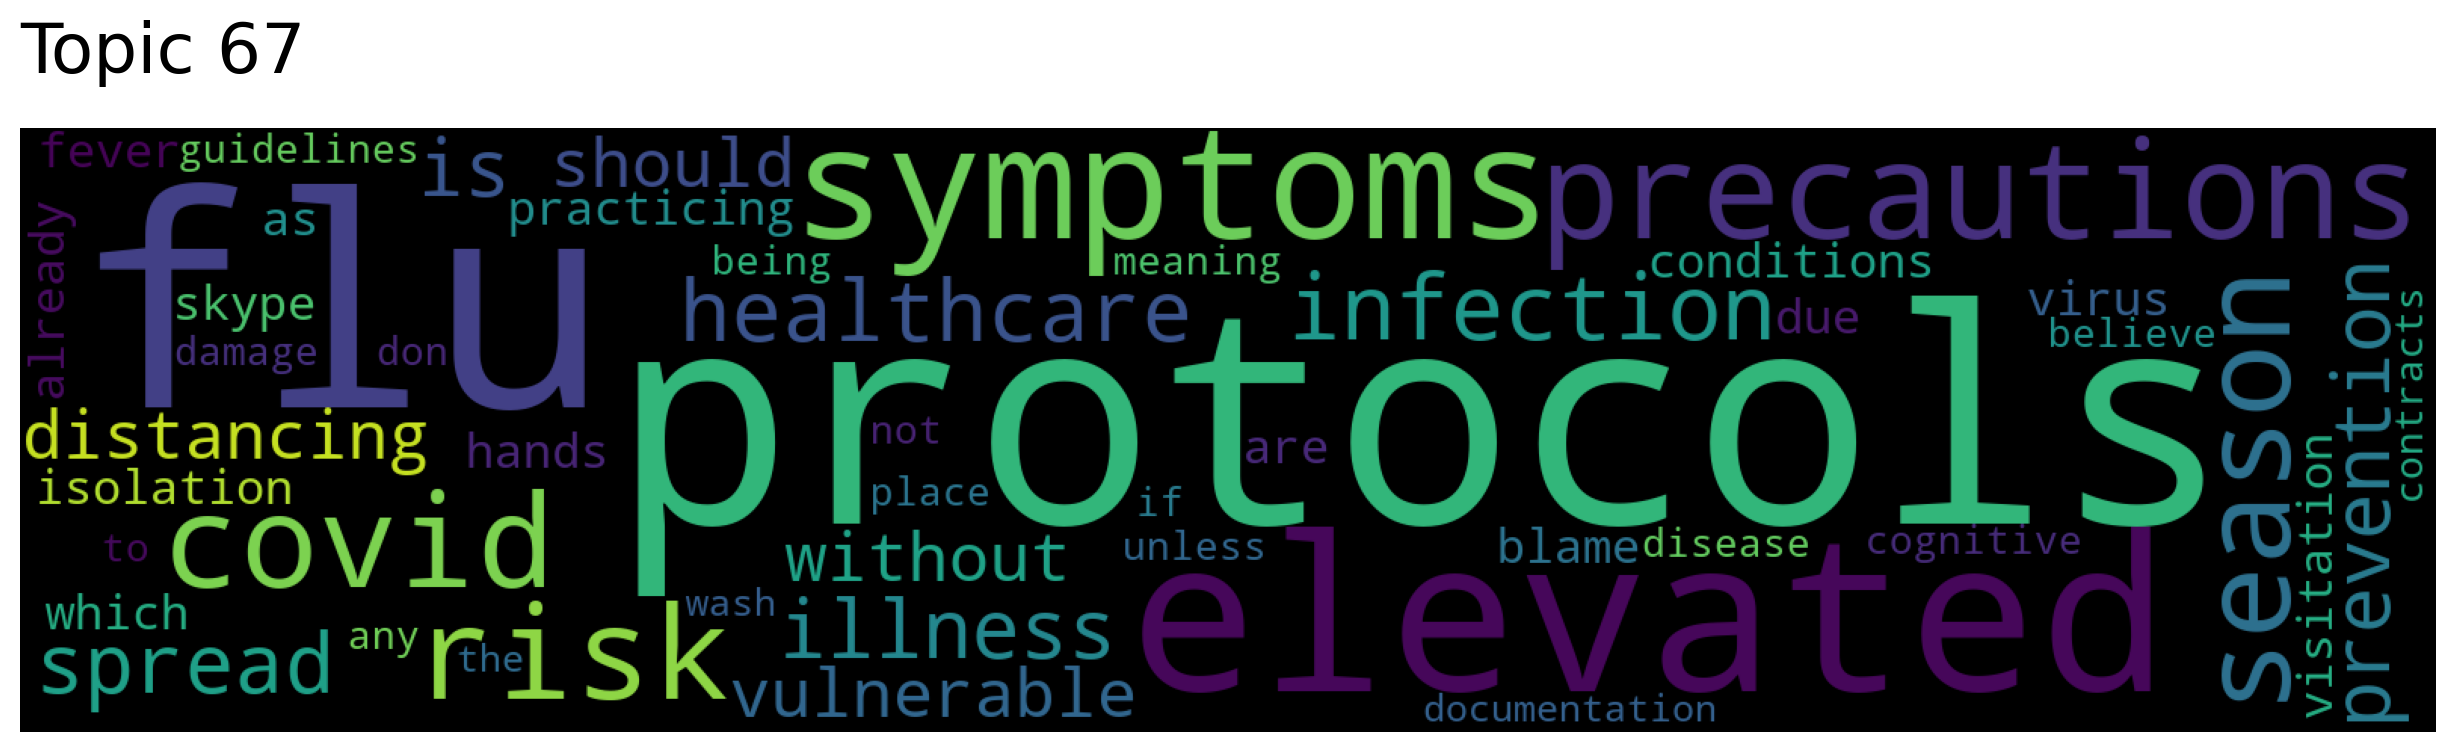

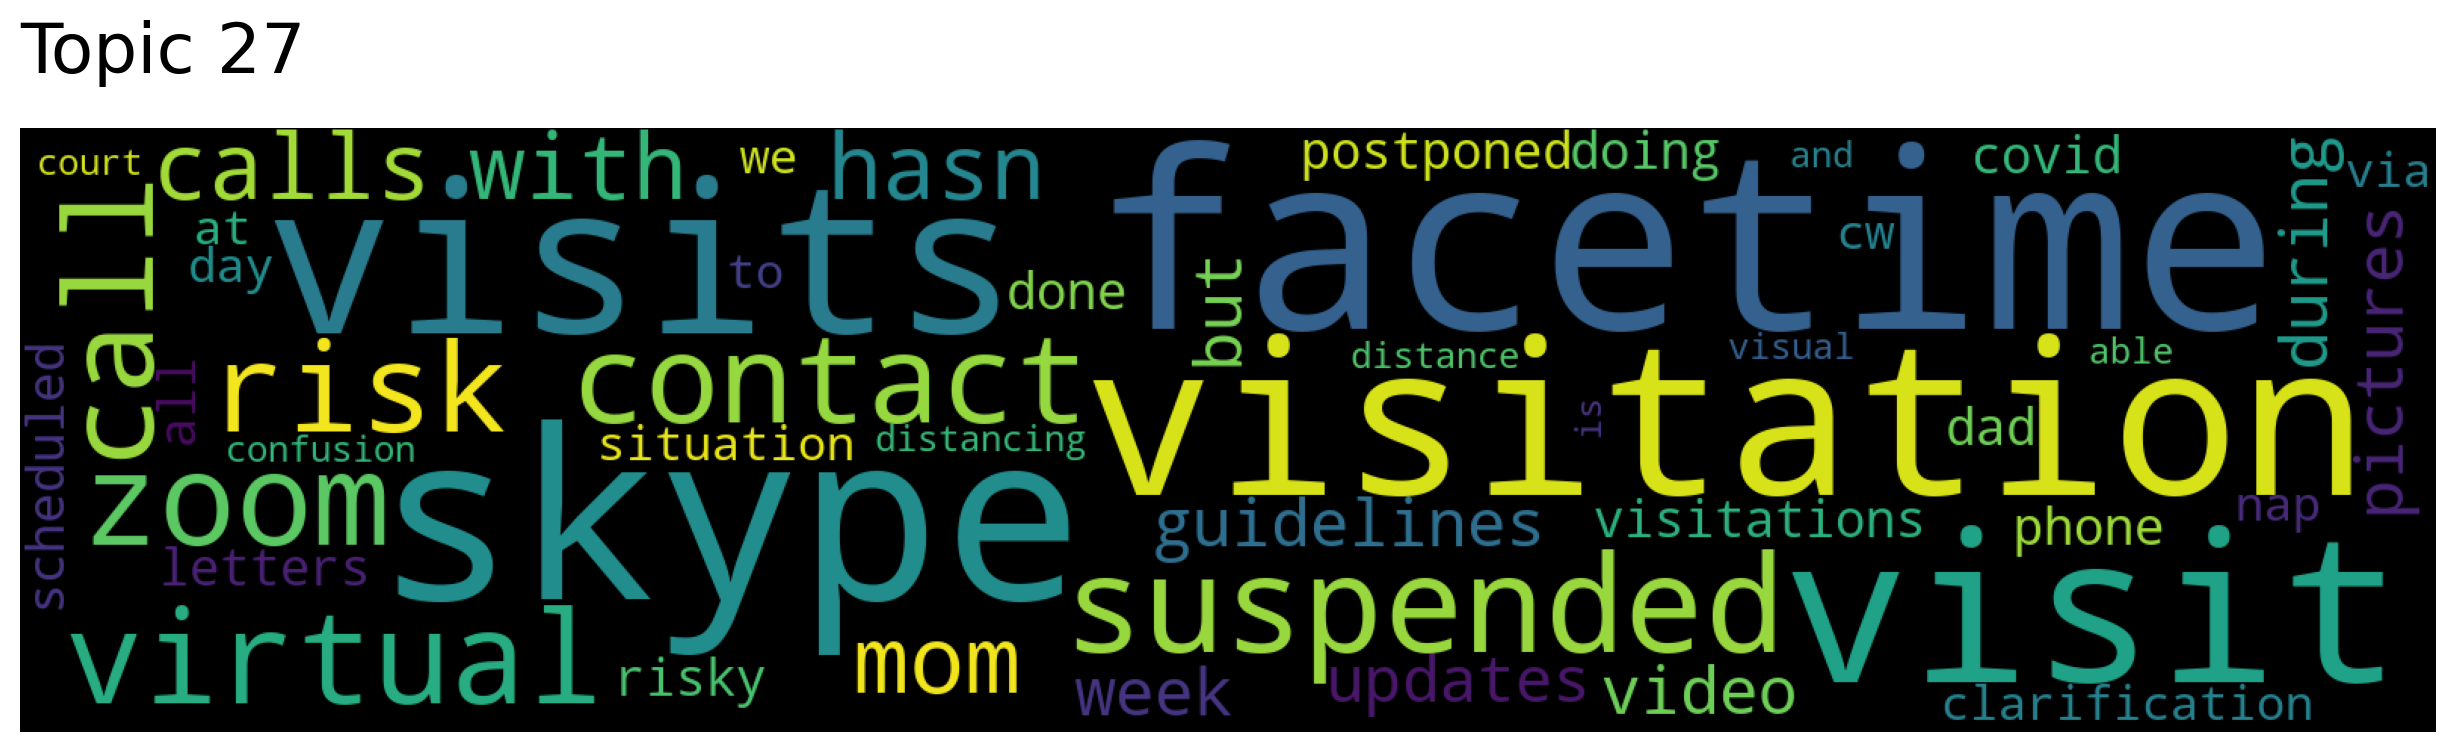

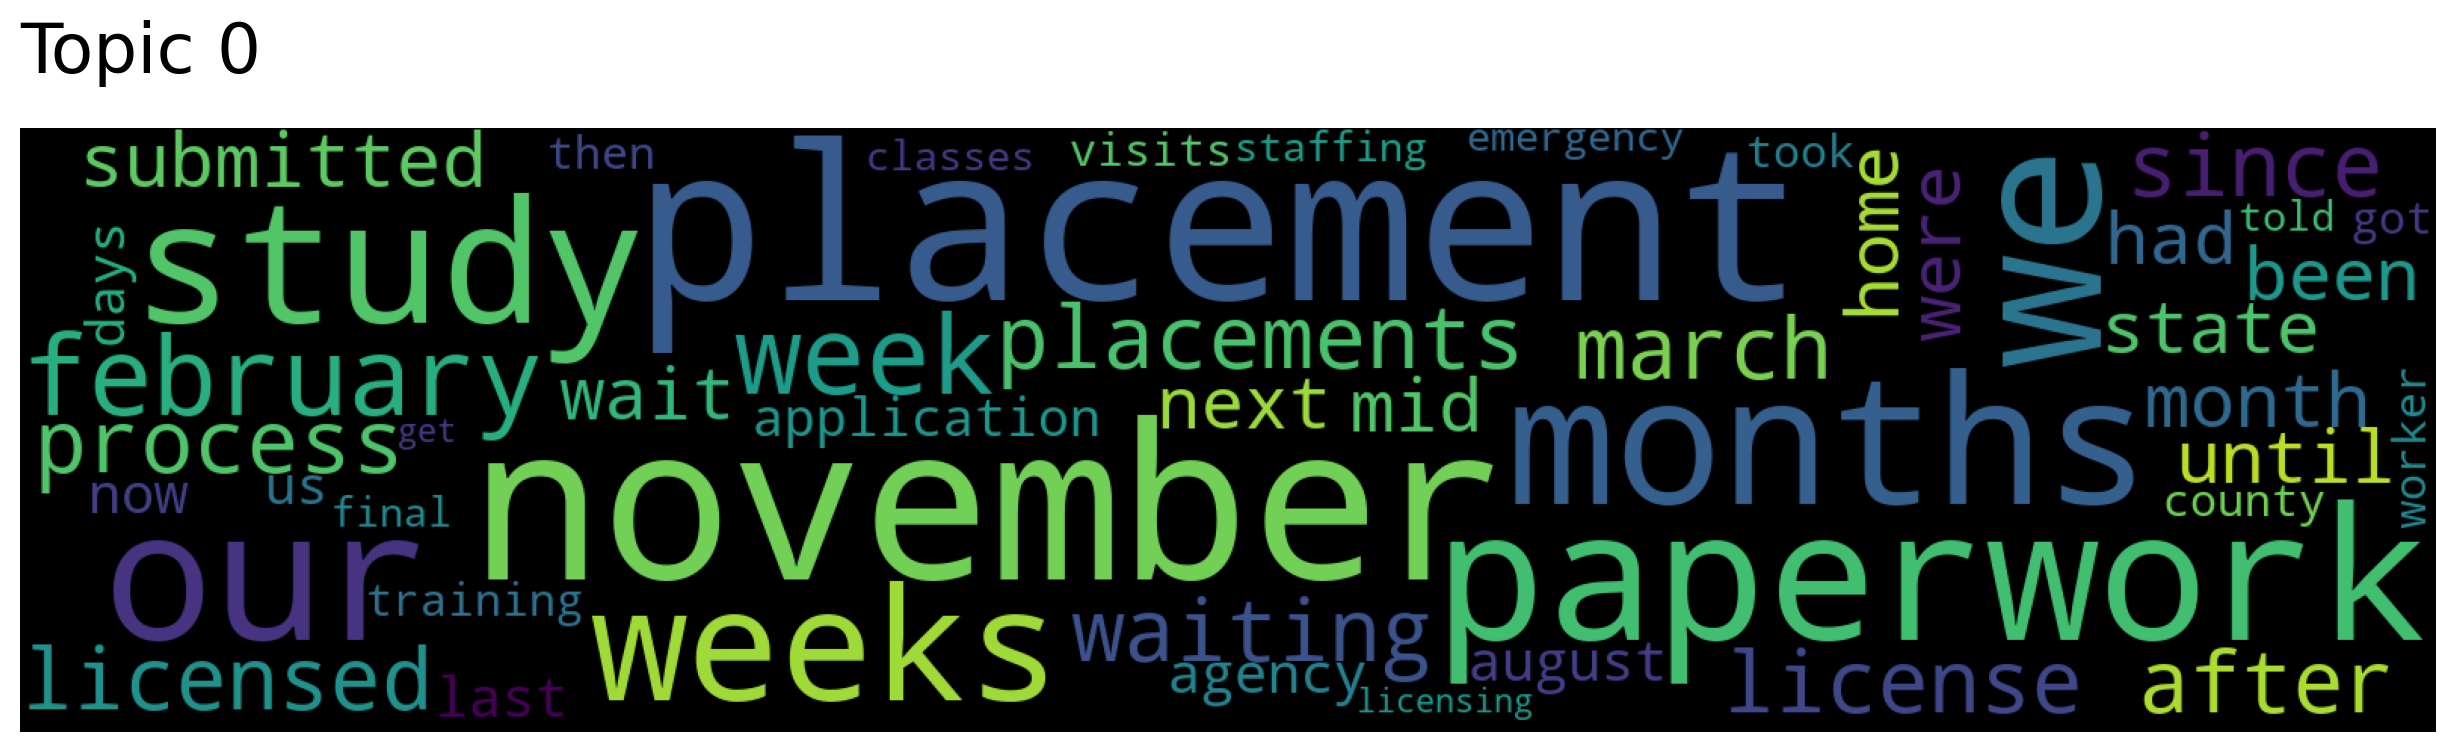

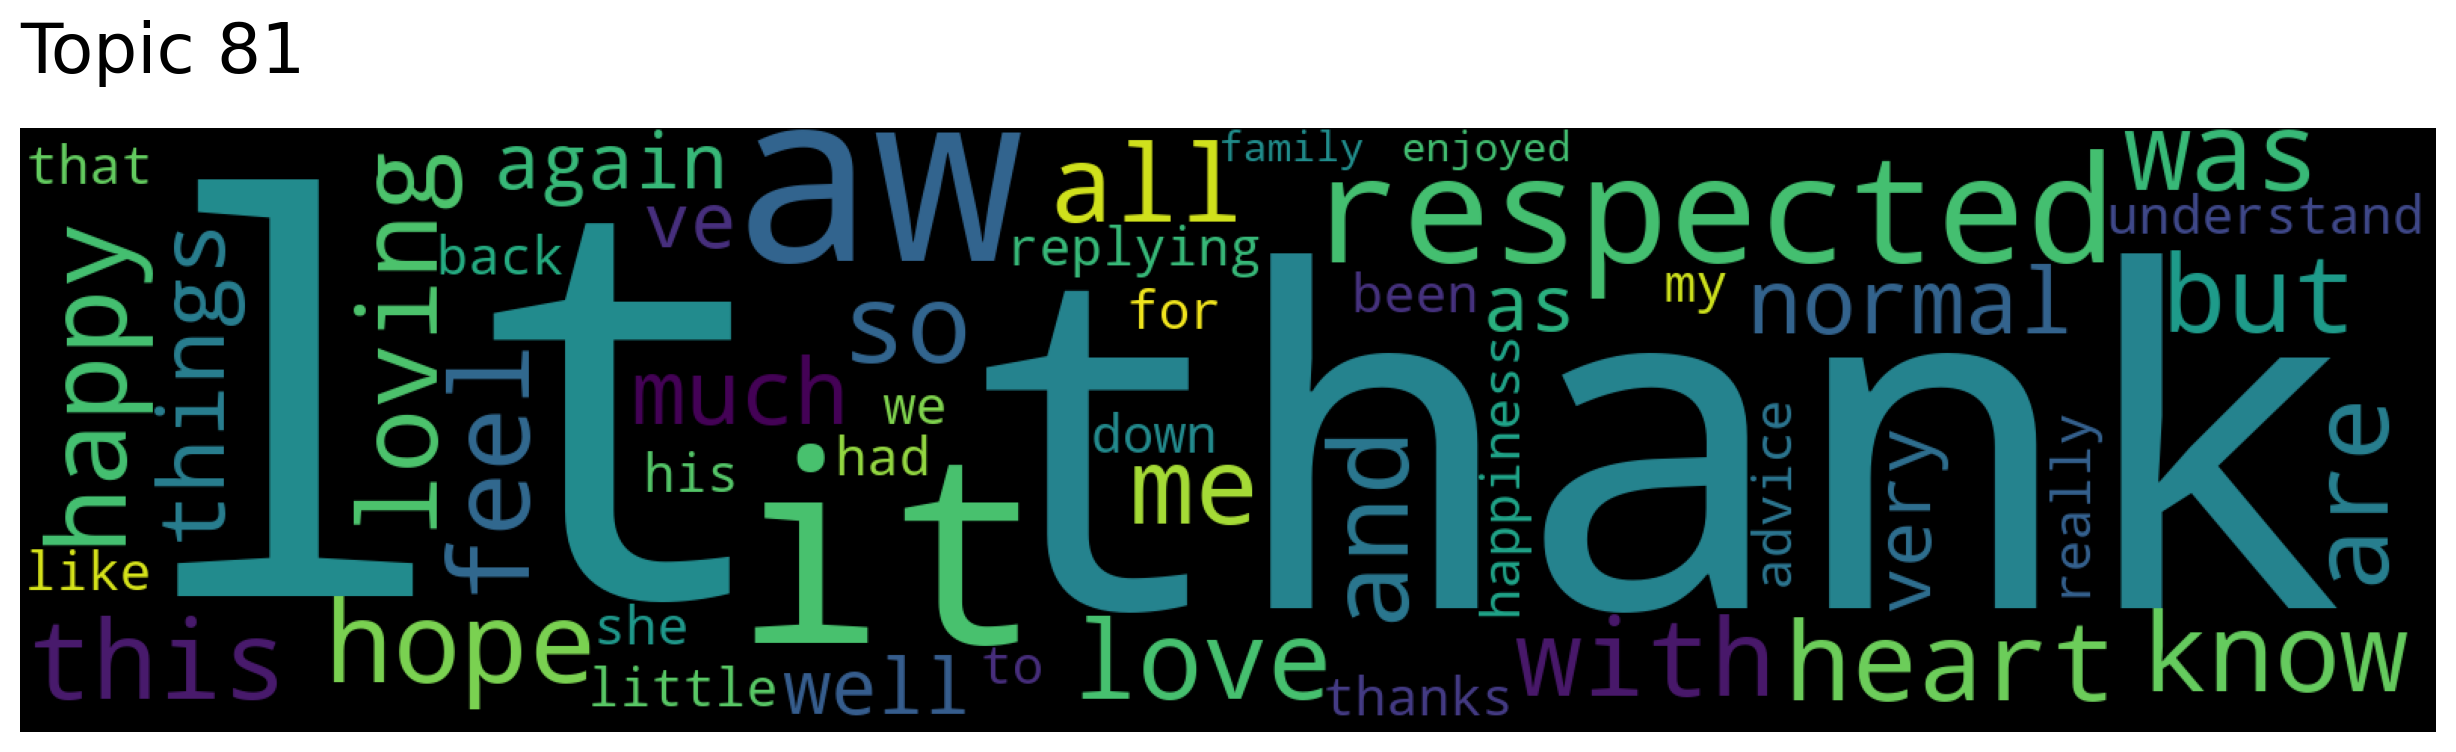

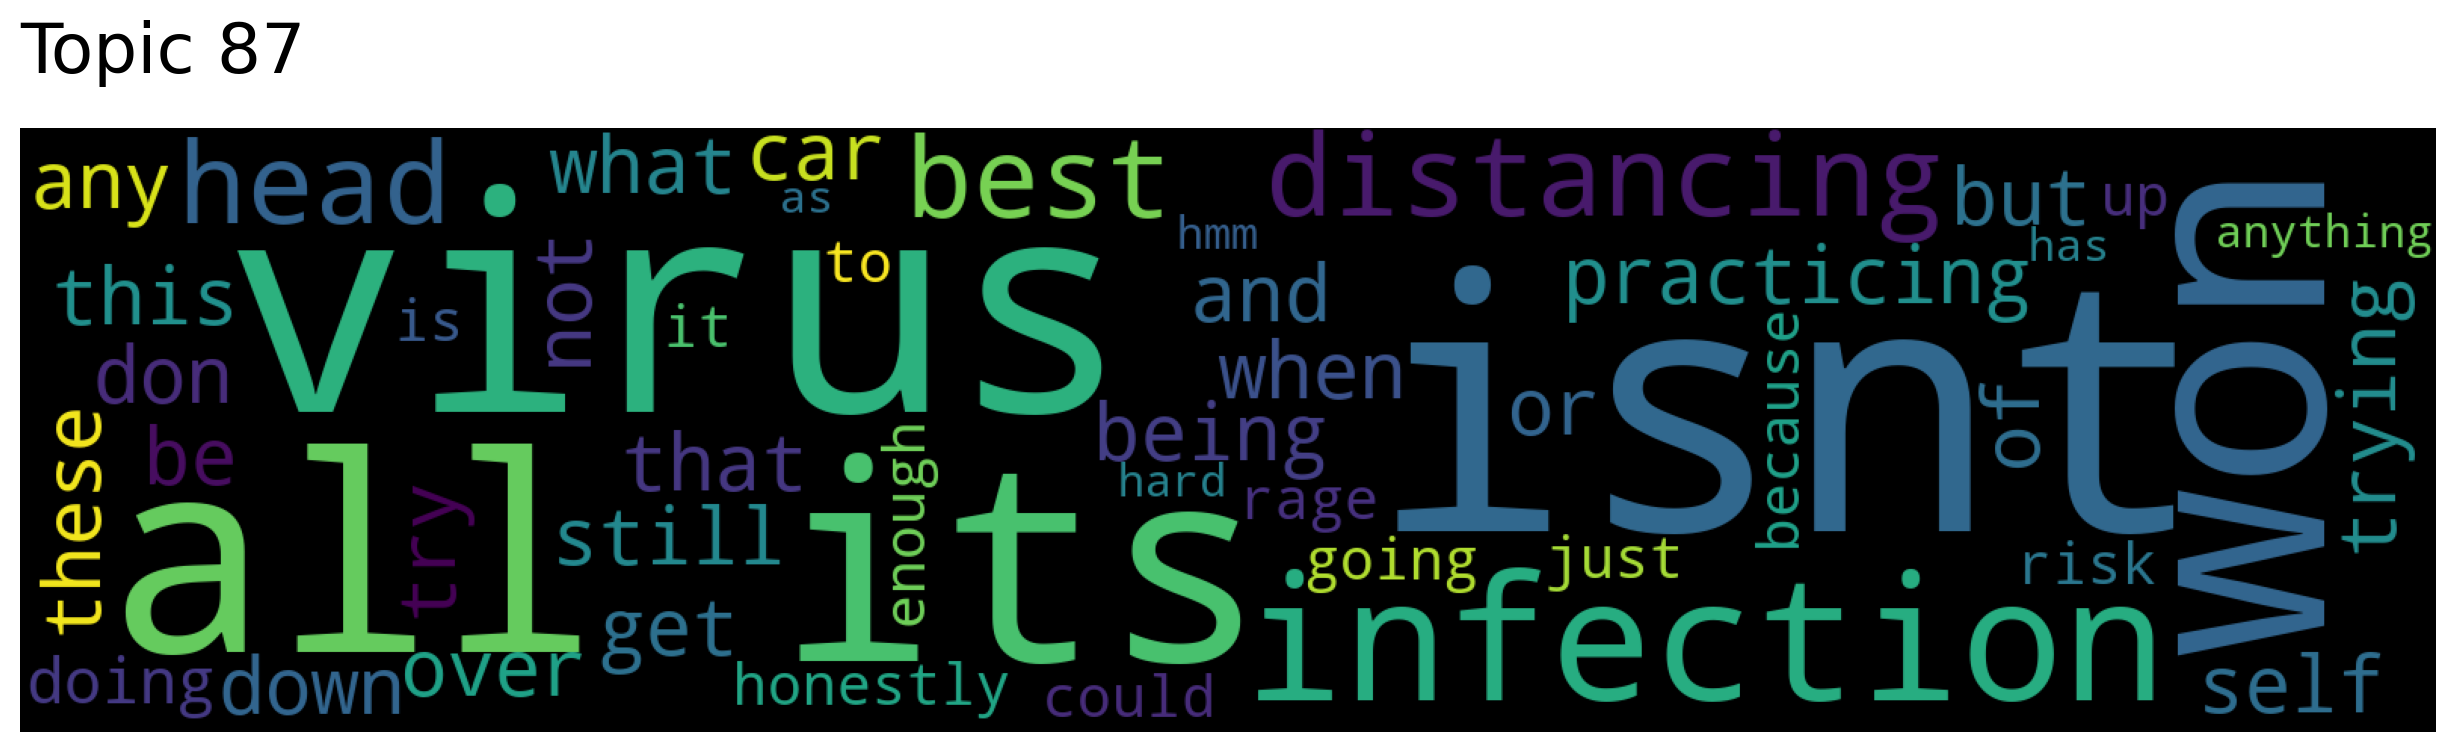

In [186]:
topic_words, word_scores, topic_scores, topic_nums = model.search_topics(keywords=["covid"], num_topics=5)
for topic in topic_nums:
    model.generate_topic_wordcloud(topic)

In [188]:
words, word_scores = model.similar_words(keywords=["covid"], keywords_neg=[], num_words=20)
for word, score in zip(words, word_scores):
    print(f"{word} {score}")

postponed 0.3843
flu 0.3843
infection 0.3832
precautions 0.3802
risk 0.3767
virus 0.3636
elevated 0.3256
pandemic 0.3249
protocols 0.324
symptoms 0.3222
due 0.2906
now 0.2859
quarantine 0.2742
ear 0.2633
distancing 0.2615
subsidy 0.2591
confirmed 0.2589
essential 0.2553
virtual 0.2538
isolation 0.2525


/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


In [189]:
topic_scores

array([0.4767, 0.2869, 0.2301, 0.2278, 0.2236])

In [190]:
model.get_topic_sizes(reduced=False)

(array([337, 320, 286, 271, 269, 267, 266, 244, 236, 199, 191, 181, 177,
        170, 170, 160, 147, 144, 139, 135, 134, 131, 121, 120, 117, 114,
        113, 111, 108, 105, 104, 103, 101, 101,  97,  97,  97,  96,  95,
         95,  94,  93,  93,  91,  91,  88,  88,  84,  84,  83,  82,  82,
         82,  80,  79,  77,  77,  76,  76,  75,  73,  73,  72,  71,  71,
         69,  68,  68,  68,  68,  67,  66,  65,  64,  63,  62,  61,  61,
         60,  60,  59,  59,  59,  58,  57,  57,  57,  56,  56,  55,  55,
         55,  55,  54,  54,  54,  53,  52,  51,  50,  49,  49,  49,  49,
         48,  48,  48,  48,  47,  47,  45,  44,  44,  42,  41,  41,  40,
         40,  39,  39,  39,  39,  38,  37,  36,  35,  34,  33,  31,  31]),
 array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  

In [191]:
import numpy as np 
import pandas as pd 
import json
import os
import ipywidgets as widgets
from IPython.display import clear_output, display
from top2vec import Top2Vec

Label(value='Enter keywords seperated by space: ')

Text(value='covid')

Label(value='Enter negative keywords seperated by space: ')

Text(value='')

Label(value='Choose number of topics: ')

Text(value='5')

Button(description='show topics', style=ButtonStyle())

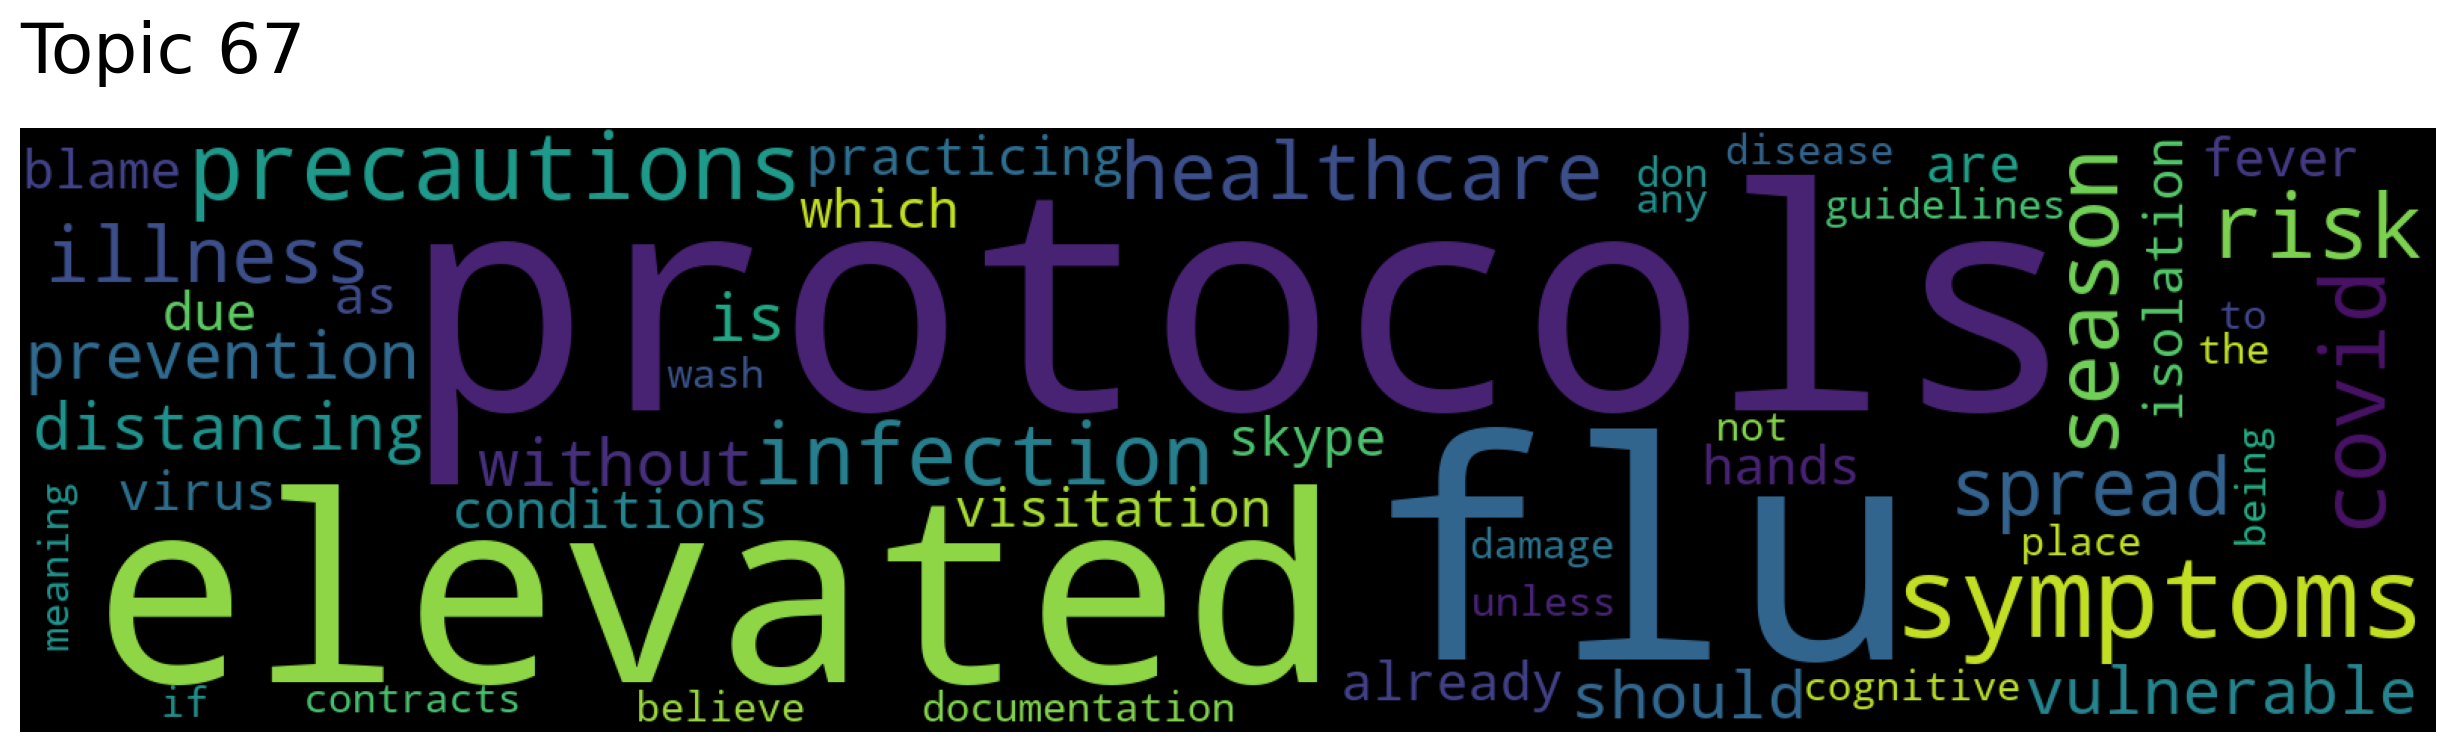

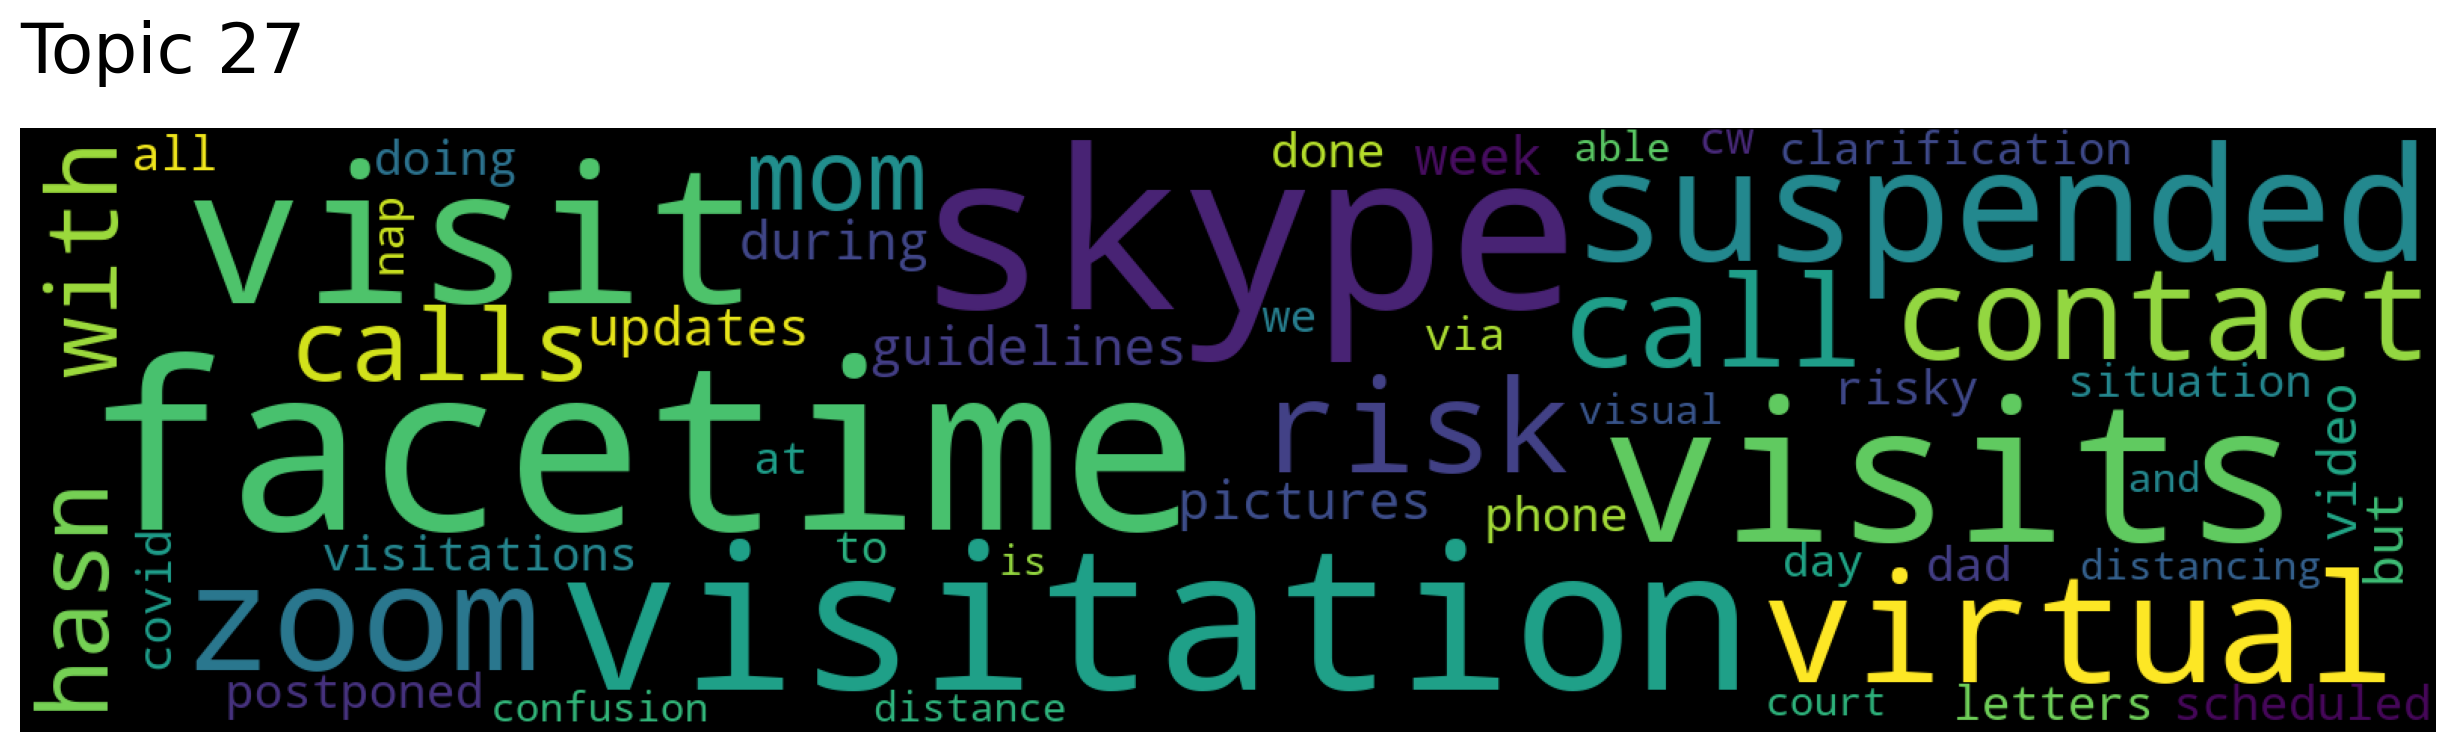

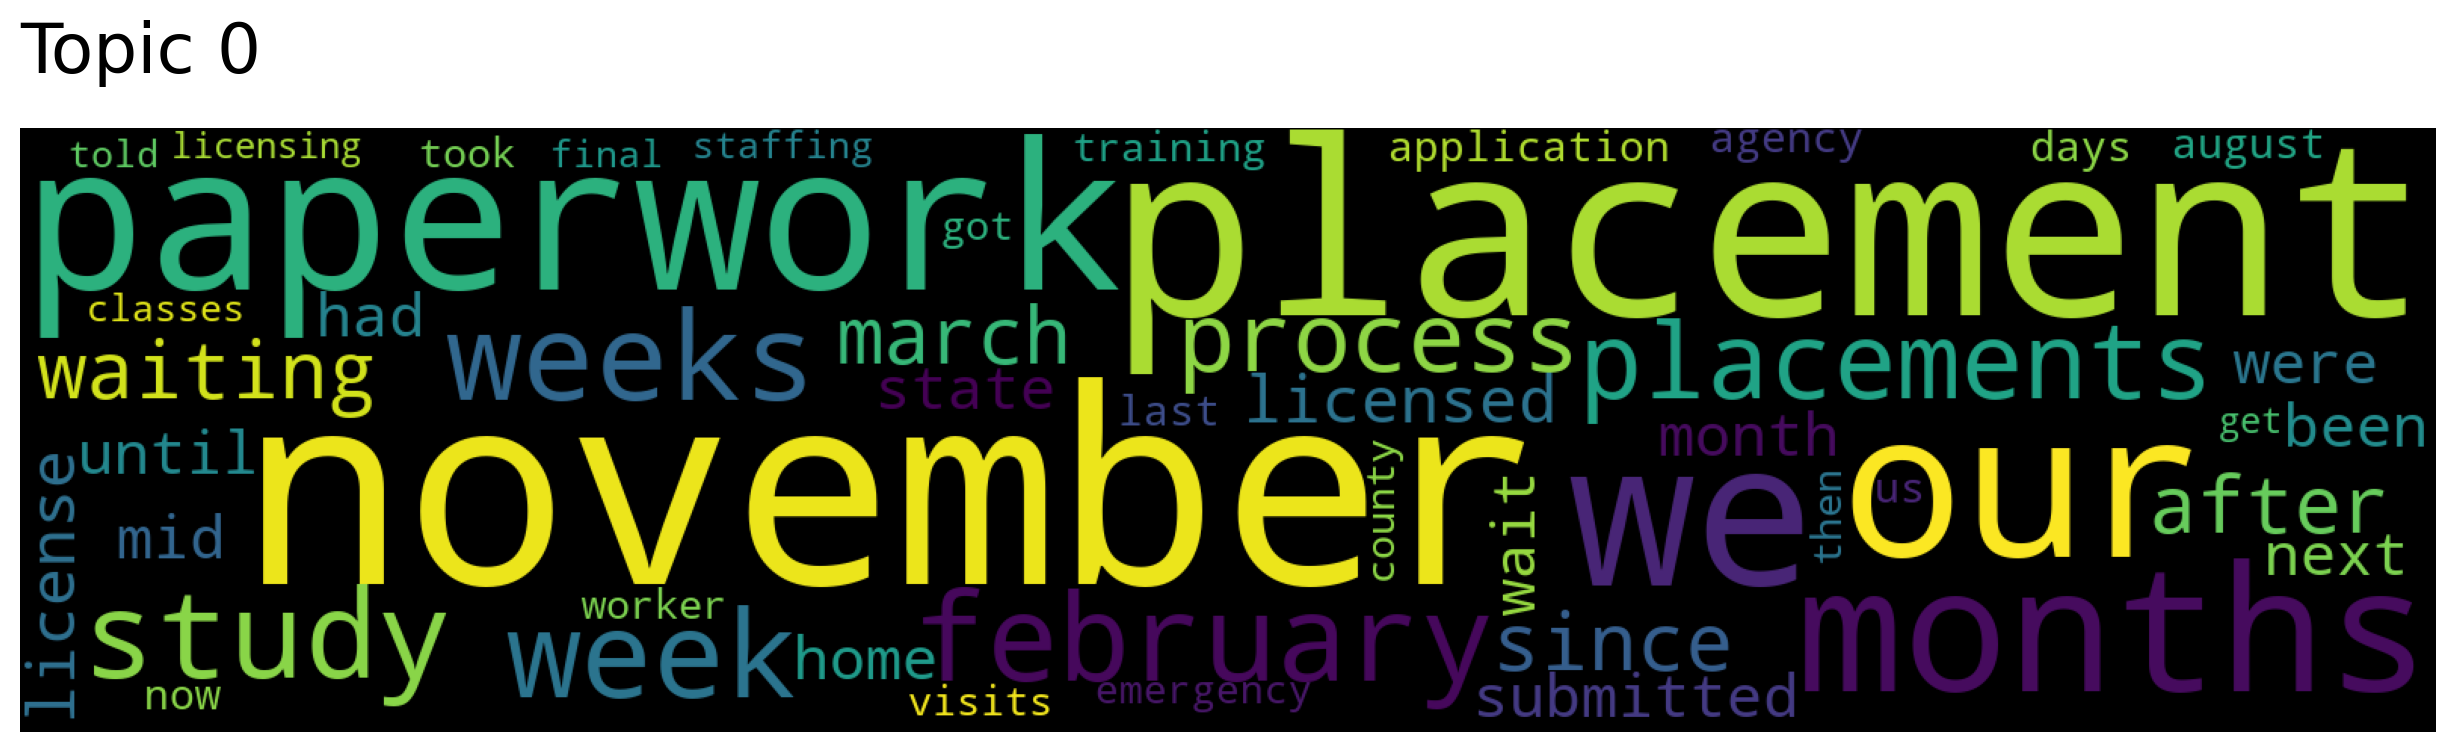

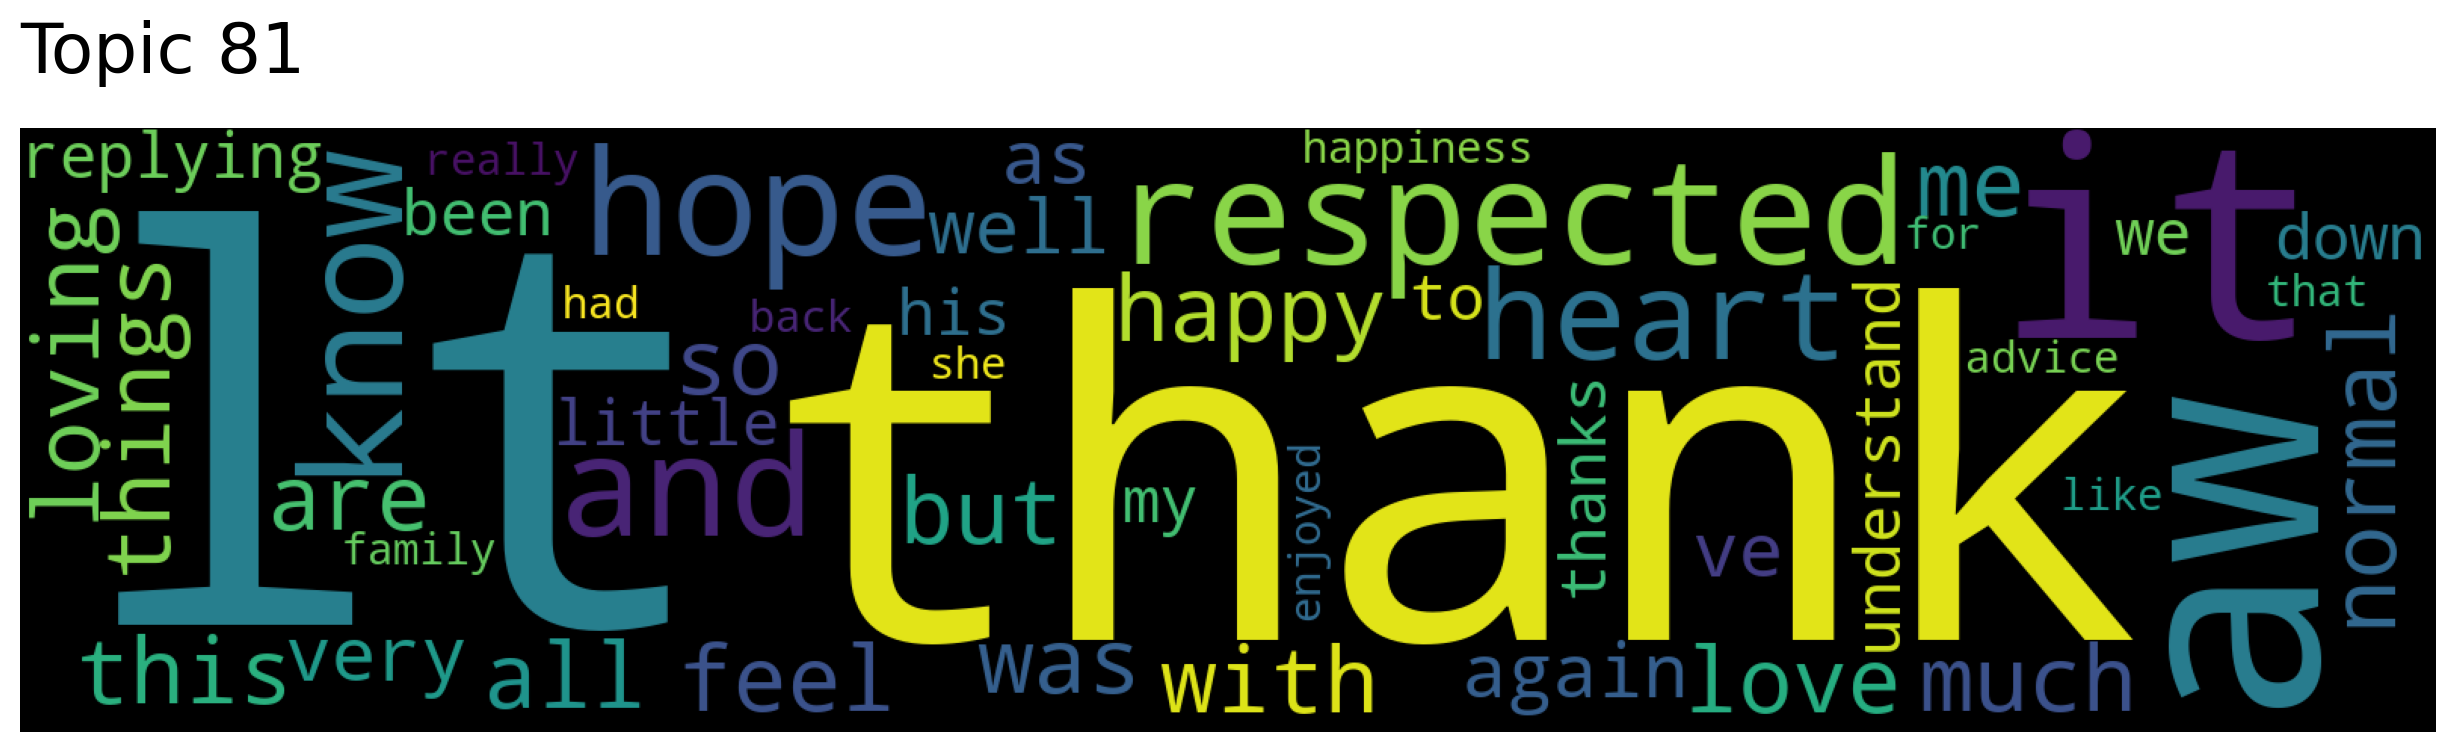

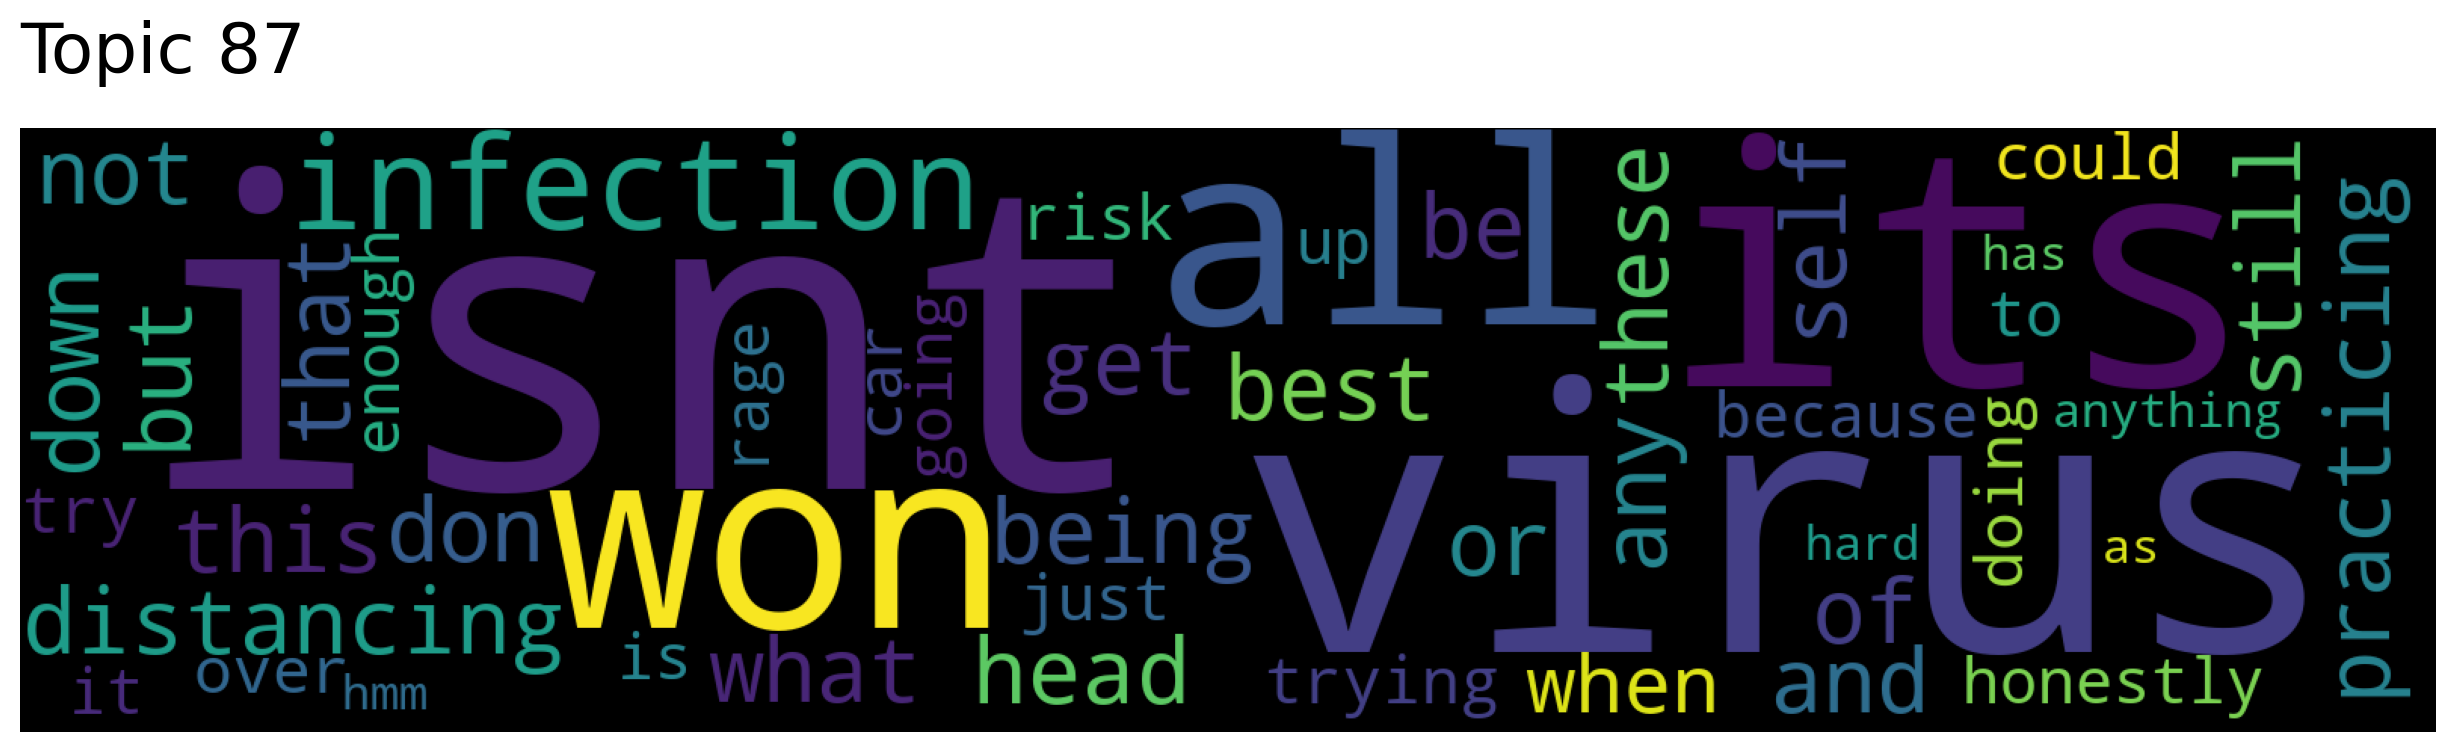

In [192]:
keywords_select_st = widgets.Label('Enter keywords seperated by space: ')
display(keywords_select_st)

keywords_input_st = widgets.Text()
display(keywords_input_st)

keywords_neg_select_st = widgets.Label('Enter negative keywords seperated by space: ')
display(keywords_neg_select_st)

keywords_neg_input_st = widgets.Text()
display(keywords_neg_input_st)

doc_num_select_st = widgets.Label('Choose number of topics: ')
display(doc_num_select_st)

doc_num_input_st = widgets.Text(value='5')
display(doc_num_input_st)

def display_similar_topics(*args):
    
    clear_output()
    display(keywords_select_st)
    display(keywords_input_st)
    display(keywords_neg_select_st)
    display(keywords_neg_input_st)
    display(doc_num_select_st)
    display(doc_num_input_st)
    display(keyword_btn_st)
    
    try:
        topic_words, word_scores, topic_scores, topic_nums = model.search_topics(keywords=keywords_input_st.value.split(),num_topics=int(doc_num_input_st.value), keywords_neg=keywords_neg_input_st.value.split())
        for topic in topic_nums:
            model.generate_topic_wordcloud(topic, background_color="black")
        
    except Exception as e:
        print(e)
        
keyword_btn_st = widgets.Button(description="show topics")
display(keyword_btn_st)
keyword_btn_st.on_click(display_similar_topics)

